In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
valid_n = [4 << i for i in range(15)]
valid_k = [2 << i for i in range(7)]

In [2]:
def gen_make_commands():
    CPU = False
   
    i = 1

    for n in valid_n:
        for k in valid_k:
            if CPU:
                print(f"$(CC) $(CFLAGS) -DNSAMPLES={n}  -DKCLASSES={k} obj/* $^ -o bin/$@-{i} -lm")
            else:
                print(f"$(CC) $(CFLAGS) -DNSAMPLES={n}  -DKCLASSES={k} obj/* $^ -o bin/$@-{i}")
            i += 1

    with open('run_tests.sh', 'w') as output:
        output.write('echo "N,K,Time(usec)" > test/results.csv\n')
        for j in range(1,i):
            output.write(f'./bin/int_test-{j} >> test/results.csv\n')
    
gen_make_commands()



$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=2 obj/* $^ -o bin/$@-1
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=4 obj/* $^ -o bin/$@-2
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=8 obj/* $^ -o bin/$@-3
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=16 obj/* $^ -o bin/$@-4
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=32 obj/* $^ -o bin/$@-5
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=64 obj/* $^ -o bin/$@-6
$(CC) $(CFLAGS) -DNSAMPLES=4  -DKCLASSES=128 obj/* $^ -o bin/$@-7
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=2 obj/* $^ -o bin/$@-8
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=4 obj/* $^ -o bin/$@-9
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=8 obj/* $^ -o bin/$@-10
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=16 obj/* $^ -o bin/$@-11
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=32 obj/* $^ -o bin/$@-12
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=64 obj/* $^ -o bin/$@-13
$(CC) $(CFLAGS) -DNSAMPLES=8  -DKCLASSES=128 obj/* $^ -o bin/$@-14
$(CC) $(CFLAGS) -DNSAMPLES=16  -DKCLASSES=2 obj/* $^ -o bin/$@-15
$(CC) $(CFLAGS) -DNSAMP

In [3]:
df = pd.read_csv('gpu_results_2.csv')
df.groupby(by='N').describe()

K                                              Time(usec)  \
      count  mean        std  min  25%   50%   75%   max      count   
N                                                                     
4       6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
8       6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
16      6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
32      6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
64      6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
128     6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
256     6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
512     6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
1024    6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
2048    6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
4096    6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
8192    6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   
16384   6.0  21.0  23.723406  2.0  5.0  12.0  28.0  64.0        6.0   

                                                                             \
                mean           std      min        25%       50%        75%   
N                                                                             
4        9502.333333  3.635584e+03   6659.0    7058.75    8305.0   10183.50   
8        9575.833333  3.654531e+03   6655.0    7095.50    8281.0   10522.50   
16       9504.000000  3.607934e+03   6638.0    7091.50    8293.5   10247.75   
32       9473.166667  3.616624e+03   6575.0    7042.50    8274.0   10251.00   
64       9510.166667  3.643684e+03   6622.0    7084.25    8298.0   10220.50   
128      9960.666667  4.042933e+03   6618.0    7040.75    9113.0   10704.50   
256      9595.166667  3.508676e+03   6932.0    7345.75    8265.0   10229.75   
512     35450.000000  1.902797e+04  18760.0   21816.00   31092.0   40572.75   
1024    37789.500000  1.679344e+04  23456.0   29200.25   30462.5   41008.25   
2048    49147.666667  1.291781e+04  33827.0   41859.00   45469.0   56873.00   
4096    62773.333333  2.181925e+04  41932.0   48673.50   53675.0   75998.50   
8192    91289.333333  3.989866e+04  55065.0   66142.00   73333.0  113879.50   
16384  607669.666667  1.071571e+06  86441.0  107439.75  191771.0  278981.50   

                  
             max  
N                 
4        16292.0  
8        16268.0  
16       16209.0  
32       16174.0  
64       16302.0  
128      17335.0  
256      16185.0  
512      69299.0  
1024     69053.0  
2048     68791.0  
4096     96912.0  
8192    154865.0  
16384  2788654.0

In [4]:
df = pd.read_csv('gpu_results_2.csv')
df.groupby(by='K').describe()

N                                                               \
   count         mean          std  min   25%    50%     75%      max   
K                                                                       
2   13.0  2520.307692  4790.081547  4.0  32.0  256.0  2048.0  16384.0   
4   13.0  2520.307692  4790.081547  4.0  32.0  256.0  2048.0  16384.0   
8   13.0  2520.307692  4790.081547  4.0  32.0  256.0  2048.0  16384.0   
16  13.0  2520.307692  4790.081547  4.0  32.0  256.0  2048.0  16384.0   
32  13.0  2520.307692  4790.081547  4.0  32.0  256.0  2048.0  16384.0   
64  13.0  2520.307692  4790.081547  4.0  32.0  256.0  2048.0  16384.0   

   Time(usec)                                                           \
        count           mean            std      min      25%      50%   
K                                                                        
2        13.0   46009.461538   69911.594919   6575.0   6638.0   7277.0   
4        13.0   29991.307692   39209.419288   6846.0   6911.0   6956.0   
8        13.0   54471.000000   84005.160400   7514.0   7597.0   7625.0   
16       13.0   30097.846154   28366.990546   8943.0   8992.0  10601.0   
32       13.0   29789.076923   24271.954435  10569.0  10667.0  11014.0   
64       13.0  248675.538462  763563.858839  16174.0  16268.0  17335.0   

                        
        75%        max  
K                       
2   47582.0   243961.0  
4   33827.0   139581.0  
8   59970.0   290655.0  
16  41360.0    96726.0  
32  43356.0    86441.0  
64  68791.0  2788654.0

Text(0.5, 1.0, 'GPU(naive) -- Time (sec) vs. Number of Sample Points for fixed K')

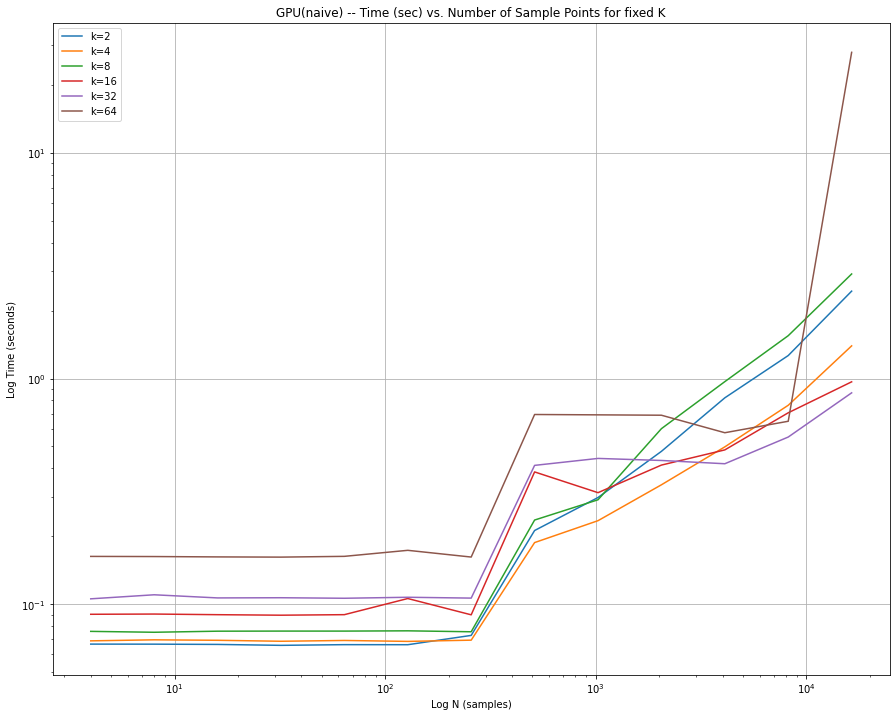

In [5]:
df = pd.read_csv('gpu_results_2.csv')
ns = df.groupby(by='N')
ks = []
plt.figure(figsize=(15, 12))

for i in valid_k:
    ks.append(df[df.K == i])

for p in ks:
    plt.subplot()
    plt.plot(p['N'], p['Time(usec)']/100000)

plt.ticklabel_format(style='plain')
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.legend(['k=2', 'k=4', 'k=8', 'k=16', 'k=32', 'k=64'])
plt.xlabel('Log N (samples)')
plt.ylabel('Log Time (seconds)')
plt.title('GPU(naive) -- Time (sec) vs. Number of Sample Points for fixed K')



Text(0.5, 1.0, 'GPU(naive) -- Time (sec) vs. Number of Sample Distributions for fixed N')

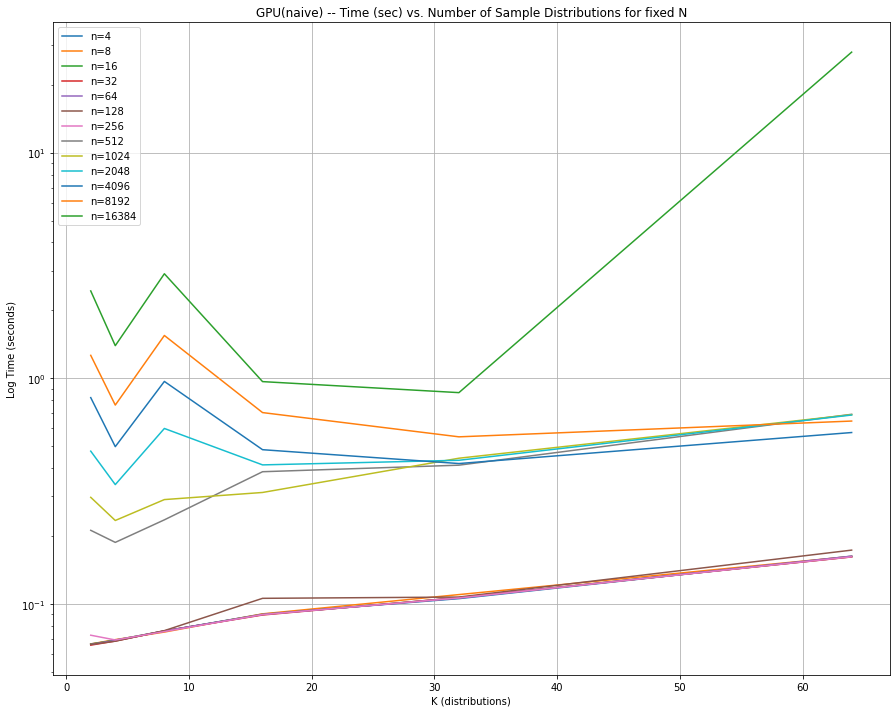

In [6]:
df = pd.read_csv('gpu_results_2.csv')
ks = df.groupby(by='K')
ns = []
for i in valid_n:
    ns.append(df[df.N == i])

ns

plt.figure(figsize=(15, 12))
for p in ns:
    plt.subplot()
    plt.plot(p['K'], p['Time(usec)']/100000)
plt.ticklabel_format(style='plain')
plt.grid()
plt.yscale('log')
plt.xscale('linear')
plt.legend(['n=4', 'n=8', 'n=16', 'n=32', 'n=64', 'n=128', 'n=256', 'n=512', 'n=1024', 'n=2048', 'n=4096', 'n=8192', 'n=16384'])
plt.xlabel('K (distributions)')
plt.ylabel('Log Time (seconds)')
plt.title('GPU(naive) -- Time (sec) vs. Number of Sample Distributions for fixed N')
